In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as npimg
from os import listdir

In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [3]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 5C0E-61B9

 Directory of C:\Users\Personal00\Desktop\new desk\Python\deep learning\image classification using cnn for flowsers

05-10-2023  03:35 PM    <DIR>          .
05-10-2023  03:35 PM    <DIR>          ..
04-10-2023  06:58 PM    <DIR>          .ipynb_checkpoints
04-10-2023  07:31 PM    <DIR>          flowers
05-10-2023  03:35 PM         3,428,578 image classification using cnn for flowsers.ipynb
               1 File(s)      3,428,578 bytes
               4 Dir(s)  41,062,363,136 bytes free


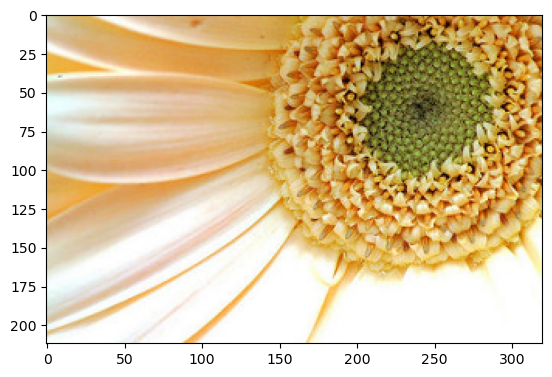

In [15]:
img=npimg.imread('flowers/flowers/flower_photos/train/daisy/5673551_01d1ea993e_n.jpg')
plt.imshow(img)

In [16]:
list_class=listdir('flowers/flowers/flower_photos/train')
list_class

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [56]:
# define all parameteres
img_width , img_hight=300,300
# no_of_training_samples=100
# no_of_validation_samples=100
total_batch_size=10
no_of_epochs=20
training_set_loc = 'flowers/flowers/flower_photos/train'
testing_set_loc = 'flowers/flowers/flower_photos/test'
validation_set_loc = 'flowers/flowers/flower_photos/validation'
no_of_classes=len(list_class)

In [57]:
import tensorflow.keras.backend as k
if k.image_data_format()=='channel_first':
    input_shape= (3, img_width,img_hight)
else :
    input_shape= (img_width, img_hight,3)

In [58]:
train_data_gen=ImageDataGenerator(rescale=1/255,horizontal_flip=True,zoom_range=0.2,
                                  shear_range=0.2)
vali_data_gen=ImageDataGenerator(rescale=1/255) # brigthning rgb value from 0-1
test_data_gen=ImageDataGenerator(rescale=1/255)
train_generator=train_data_gen.flow_from_directory(training_set_loc,target_size=(img_width,img_hight),
                                                   batch_size=total_batch_size,
                                                   class_mode='categorical',
                                                   classes=list_class)
validation_generator=vali_data_gen.flow_from_directory(validation_set_loc,
                                                    target_size=(img_width,img_hight),
                                                   batch_size=total_batch_size,
                                                   class_mode='categorical',
                                                   classes=list_class)
test_generator=test_data_gen.flow_from_directory(testing_set_loc,
                                                 target_size=(img_width,img_hight),
                                                   batch_size=total_batch_size,
                                                   class_mode='categorical',
                                                   classes=list_class)

Found 3540 images belonging to 5 classes.
Found 80 images belonging to 5 classes.
Found 50 images belonging to 5 classes.


In [59]:
# to find proper 'steps per epoch'
no_of_training_samples=train_generator.n//train_generator.batch_size
no_of_validation_samples=validation_generator.n//validation_generator.batch_size
print(no_of_training_samples,no_of_validation_samples)


354 8


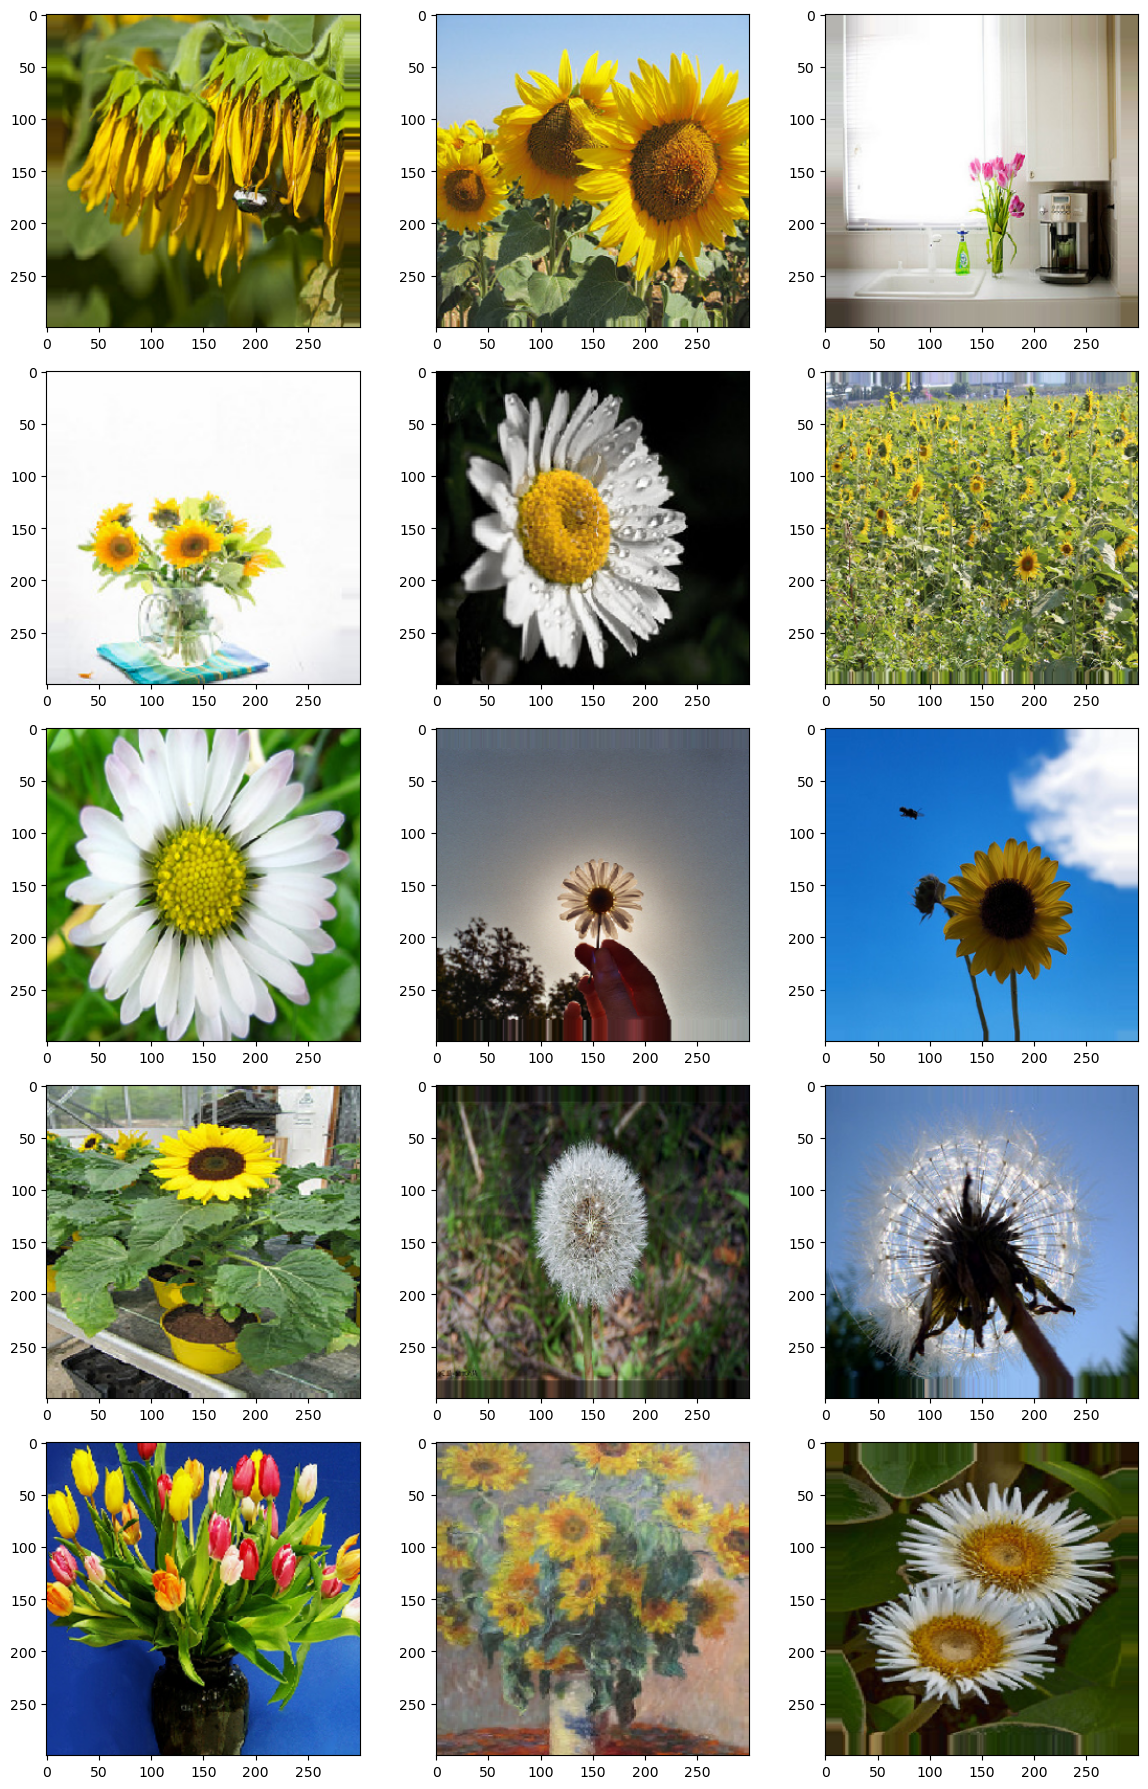

In [60]:
# how training data looks
plt.figure(figsize=(12,18))
for i in range(0,15):
    plt.subplot(5,3,i+1)
    for x_data, y_data in train_generator:
        image=x_data[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [99]:
# building a model
class_flowers=Sequential()

# define CNN
class_flowers.add(Conv2D(64,kernel_size=(3,3),input_shape=input_shape))
class_flowers.add(Activation('relu'))
class_flowers.add(tf.keras.layers.MaxPooling2D((2,2)))
class_flowers.add(tf.keras.layers.MaxPooling2D((2,2)))
class_flowers.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 298, 298, 64)      1792      
                                                                 
 activation_23 (Activation)  (None, 298, 298, 64)      0         
                                                                 
 max_pooling2d_34 (MaxPooli  (None, 149, 149, 64)      0         
 ng2D)                                                           
                                                                 
 max_pooling2d_35 (MaxPooli  (None, 74, 74, 64)        0         
 ng2D)                                                           
                                                                 
Total params: 1792 (7.00 KB)
Trainable params: 1792 (7.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [100]:
# fully connected ANN
class_flowers.add(Flatten())

class_flowers.add(Dense(64,activation='relu'))
class_flowers.add(tf.keras.layers.Dropout(0.2))

class_flowers.add(Dense(32,activation='relu'))
class_flowers.add(Dropout(0.2))

class_flowers.add(Dense(5,activation='softmax'))

In [101]:
class_flowers.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 298, 298, 64)      1792      
                                                                 
 activation_23 (Activation)  (None, 298, 298, 64)      0         
                                                                 
 max_pooling2d_34 (MaxPooli  (None, 149, 149, 64)      0         
 ng2D)                                                           
                                                                 
 max_pooling2d_35 (MaxPooli  (None, 74, 74, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_18 (Flatten)        (None, 350464)            0         
                                                                 
 dense_51 (Dense)            (None, 64)              

In [102]:
# compile model
class_flowers.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
class_flowers.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 298, 298, 64)      1792      
                                                                 
 activation_23 (Activation)  (None, 298, 298, 64)      0         
                                                                 
 max_pooling2d_34 (MaxPooli  (None, 149, 149, 64)      0         
 ng2D)                                                           
                                                                 
 max_pooling2d_35 (MaxPooli  (None, 74, 74, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_18 (Flatten)        (None, 350464)            0         
                                                                 
 dense_51 (Dense)            (None, 64)              

In [126]:
# trainning model
training=class_flowers.fit(train_generator,
                           steps_per_epoch=no_of_training_samples,
                           epochs=no_of_epochs,
                          validation_data=validation_generator,
                          validation_steps=no_of_validation_samples,
                          )
# epochs used an experimental value to testing

Epoch 1/20
354/354 [==============================] - 435s 1s/step - loss: 1.4178 - accuracy: 0.4133 - val_loss: 1.1603 - val_accuracy: 0.5250
Epoch 2/20
354/354 [==============================] - 347s 979ms/step - loss: 1.2320 - accuracy: 0.4870 - val_loss: 1.0777 - val_accuracy: 0.6000
Epoch 3/20
354/354 [==============================] - 344s 971ms/step - loss: 1.1534 - accuracy: 0.5215 - val_loss: 0.9448 - val_accuracy: 0.6500
Epoch 4/20
354/354 [==============================] - 341s 961ms/step - loss: 1.0810 - accuracy: 0.5525 - val_loss: 0.9747 - val_accuracy: 0.6250
Epoch 5/20
354/354 [==============================] - 343s 970ms/step - loss: 1.0291 - accuracy: 0.5969 - val_loss: 0.9907 - val_accuracy: 0.6375
Epoch 6/20
354/354 [==============================] - 378s 1s/step - loss: 0.9818 - accuracy: 0.6175 - val_loss: 0.8835 - val_accuracy: 0.6500
Epoch 7/20
354/354 [==============================] - 427s 1s/step - loss: 0.9619 - accuracy: 0.6164 - val_loss: 1.1186 - val_accu

In [27]:
print(training.history.keys())# listing all daata
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy ')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()



NameError: name 'training' is not defined

In [125]:
print(training.history.keys())# listing all daata
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss ')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

NameError: name 'training' is not defined

In [120]:
from tensorflow.keras.preprocessing import image
import numpy as np

load_img=image.load_img('flowers/flowers/flower_photos/train/daisy/5673551_01d1ea993e_n.jpg')
resize_img=image.smart_resize(load_img,size=(img_width,img_hight))
array_img=image.img_to_array(resize_img)

In [121]:
expand_img=np.expand_dims(array_img,axis=0)
model_result=class_flowers.predict(expand_img)
print(model_result)

1/1 [==============================] - 0s 103ms/step
[[0. 0. 1. 0. 0.]]


In [122]:
list_class=listdir('flowers/flowers/flower_photos/train')
list_class

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

roses


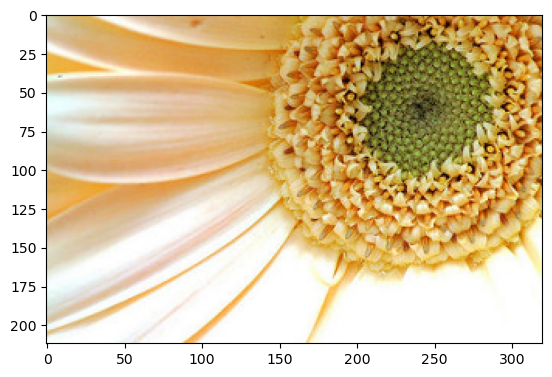

In [124]:
if model_result[0][0]==1:
    prediction='daisy'
elif model_result[0][1]==1:
    prediction='dandelion'
elif model_result[0][2]==1:
    prediction='roses'
elif model_result[0][3]==1:
    prediction='sunflowers'
else :
    prediction='tulips'
    
    
print(prediction)
plt.imshow(load_img)